In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary = pd.read_csv('Salary_data.csv')

In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
salary = salary.rename({'YearsExperience':'Year'},axis =1)

In [6]:
salary.head()

,Year,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
salary['Salary']=salary['Salary'].astype('float')

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
salary.describe()

,Year,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Correlation

In [13]:
salary.corr()

,Year,Salary
Year,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Year', ylabel='Density'>

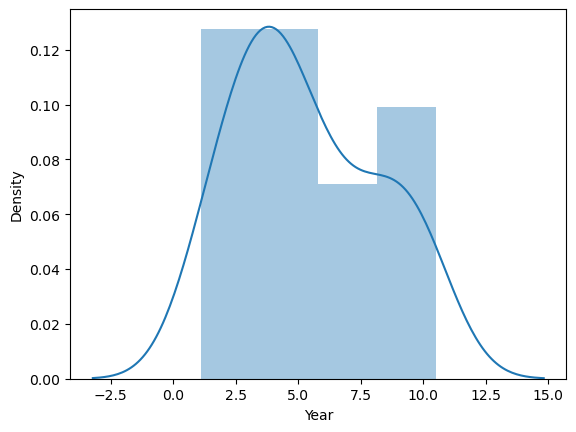

In [20]:
sns.distplot(salary['Year'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

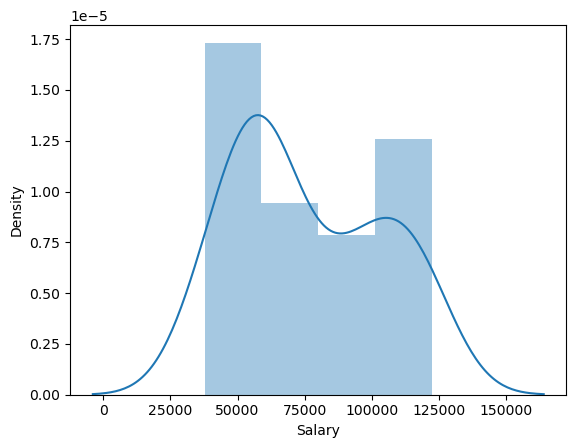

In [21]:
sns.distplot(salary["Salary"])

<AxesSubplot:xlabel='Year', ylabel='Salary'>

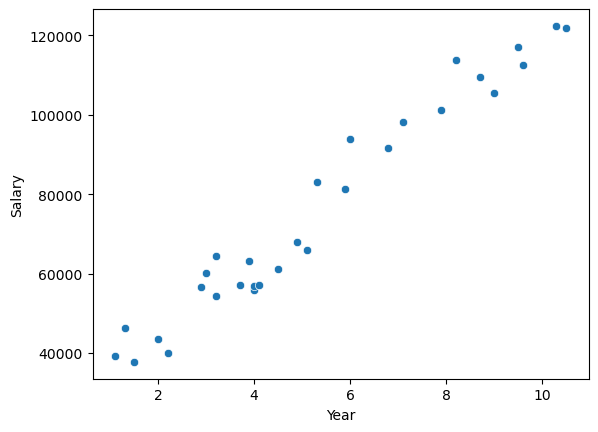

In [23]:
sns.scatterplot(x='Year',y='Salary',data= salary)

In [24]:
model = smf.ols("Salary~Year",data=salary).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        18:50:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Year        9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
pred = model.predict(salary['Year'])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

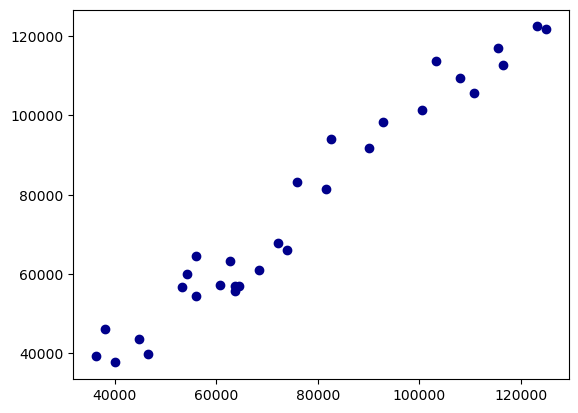

In [31]:
plt.scatter(x=pred,y=salary.Salary,color='darkblue')

# Tranformations

In [32]:
# logarithimic model
import numpy as np
model2 = smf.ols("Salary~np.log(Year)",data= salary).fit()


In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.25e-13
Time:                        18:56:13   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Year)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pred2 = model2.predict(salary["Year"],transform =True)
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

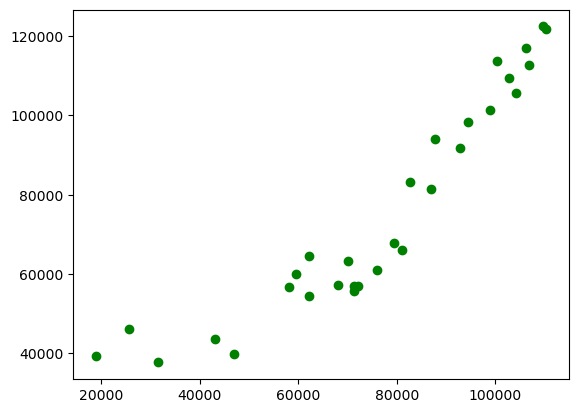

In [37]:
plt.scatter(x= pred2,y=salary.Salary,color= 'green')

In [38]:
# Exponential Tranformation
model3 = smf .ols ("np.log(Salary)~Year",data= salary).fit()

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        19:01:41   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Year           0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pred_log= model3.predict(salary['Year'])
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [41]:
pred3 = np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

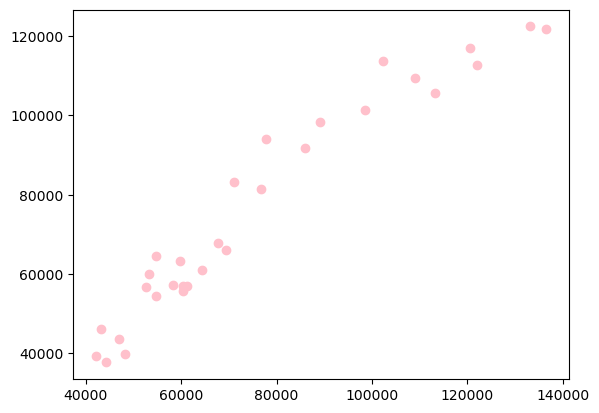

In [45]:
plt.scatter(x=pred3,y=salary.Salary,color = 'pink')

In [46]:
# quadratic model
year_sq = salary.Year*salary.Year
model_quad = smf .ols("Salary~Year+year_sq",data= salary).fit()

In [47]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.59e-19
Time:                        19:08:15   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
Year        9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
year_sq       16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pred_quad = model_quad.predict(salary['Year'])

In [55]:
pred_quad

0      36419.979959
1      38279.705169
2      40140.741784
3      44799.070719
4      46664.697252
5      53204.717436
6      54140.317439
7      56012.500998
8      56012.500998
9      60698.697296
10     62575.470775
11     63514.349291
12     63514.349291
13     64453.555659
14     68213.659642
15     71979.009247
16     73863.651157
17     75749.604472
18     81415.332851
19     82360.768394
20     89936.055383
21     92782.197551
22    100386.335458
23    103243.296720
24    108011.455849
25    110876.285543
26    115657.558725
27    116614.796916
28    123324.644086
29    125244.693940
dtype: float64

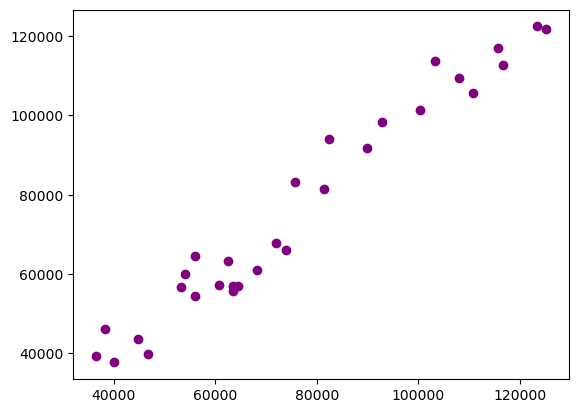

In [56]:
plt.scatter(x= pred_quad,y=salary.Salary,color = 'purple')

In [52]:
#x^4 model
year_p4 = salary.Year*salary.Year*salary.Year*salary.Year
model4 = smf.ols("Salary~Year+year_p4",data = salary).fit()

In [53]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     302.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.29e-19
Time:                        19:13:58   Log-Likelihood:                -301.34
No. Observations:                  30   AIC:                             608.7
Df Residuals:                      27   BIC:                             612.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.473e+04   3369.765      7.340      0.000    1.78e+04    3.16e+04
Year        9783.4292    863.569     11.329      0.000    8011.532    1.16e+04
year_p4       -0.2968      0.688     -0.431      0.670      -1.709       1.116
==============================================================================
Omnibus:                        1.983   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.370
Skew:                           0.283   Prob(JB):                        0.504
Kurtosis:                       2.119   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
pred4 = model4.predict(salary['Year'])
pred4

0      35494.287935
1      37450.560592
2      39406.591509
3      44295.059528
4      46249.541220
5      53083.900791
6      54059.194687
7      56008.798836
8      56008.798836
9      60876.007453
10     62819.654066
11     63790.678331
12     63790.678331
13     64761.132619
14     68636.662276
15     72500.635909
16     74427.626687
17     76350.910628
18     82095.500864
19     83048.831570
20     90625.601608
21     93440.998048
22    100865.878463
23    103615.028243
24    108148.241545
25    110836.299035
26    115257.813284
27    116132.739034
28    122161.401693
29    123850.946380
dtype: float64

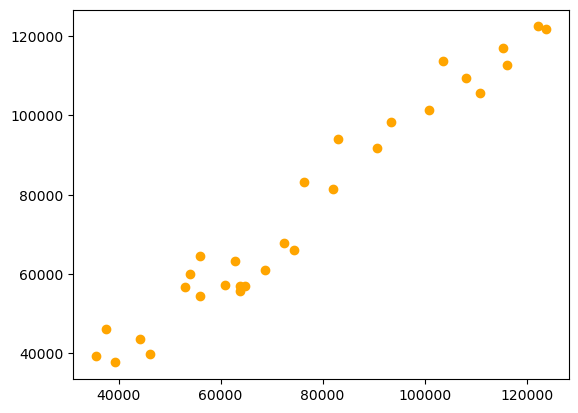

In [59]:
plt.scatter(x= pred4, y= salary.Salary,color = 'orange')

# Fitting Linear Regression Model


<AxesSubplot:ylabel='Salary'>

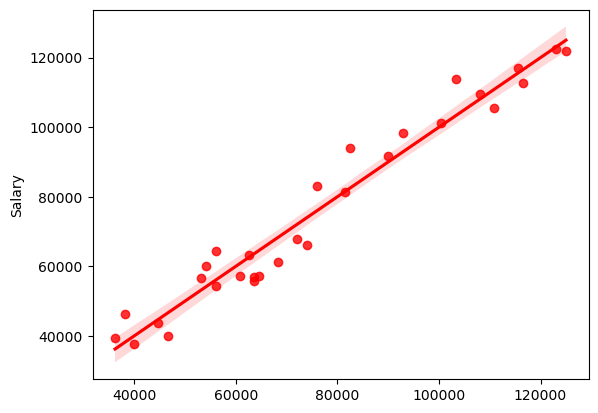

In [64]:
#  model is better without any transformation 
sns.regplot(x=pred,y=salary.Salary,data = salary,color = 'red')

In [65]:
# rsquare values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [66]:
model.params


Intercept    25792.200199
Year          9449.962321
dtype: float64

In [67]:
print(model.tvalues , "\n",model.pvalues)

Intercept    11.346940
Year         24.950094
dtype: float64 
 Intercept    5.511950e-12
Year         1.143068e-20
dtype: float64
